In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

### 1

In [214]:
data_red = 'https://raw.githubusercontent.com/foxdocs/cph-bi-2024/refs/heads/main/Data/UCL-Wine/winequality-red.csv'
df_red = pd.read_csv(data_red, sep=';')
data_white = 'https://raw.githubusercontent.com/foxdocs/cph-bi-2024/refs/heads/main/Data/UCL-Wine/winequality-white.csv'
df_white = pd.read_csv(data_white, sep=';')

### 2

### 3

In [218]:
df_red['Wine Type'] = "Red"

In [220]:
df_white['Wine Type'] = "White"

In [222]:
df_combined = pd.concat([df_red,df_white], ignore_index = True)

### 4

In [225]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [227]:
df_red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,Red


In [229]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Wine Type             1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [231]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [233]:
df_white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,White


In [235]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  Wine Type             4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [237]:
df_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [239]:
df_combined.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,White


In [241]:
df_combined.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 5

In [244]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Wine Type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [246]:
df_num = df_combined.drop('Wine Type',axis=1)
ks_results={}
for column in df_num.columns:
    stat, p_value = stats.kstest(df_num[column],stats.norm.cdf)
    ks_results[column] = {'statistic': stat, 'p_value': p_value}

ks_results_df = pd.DataFrame(ks_results).T
print(ks_results_df)

                      statistic  p_value
fixed acidity          0.999928      0.0
volatile acidity       0.542525      0.0
citric acid            0.500000      0.0
residual sugar         0.837706      0.0
chlorides              0.504815      0.0
free sulfur dioxide    0.997881      0.0
total sulfur dioxide   1.000000      0.0
density                0.838206      0.0
pH                     0.996774      0.0
sulphates              0.609908      0.0
alcohol                1.000000      0.0
quality                0.998650      0.0


none of the columns passed the Kolmogorov-Smirnov test, by all having a high "statistic" indicating a substantial difference between the distribution of the column and a normal distribution it tests against, also since all of the p_values are 0 the test indicates that the column rejects the null hypothesis.

### 6

Text(0.5, 1.0, 'Red Wine Quality')

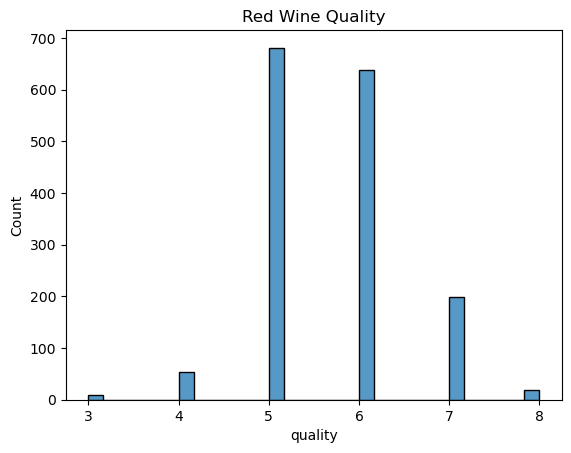

In [250]:
sns.histplot(df_combined['quality'][df_combined['Wine Type'] == 'Red']).set_title("Red Wine Quality")

Text(0.5, 1.0, 'White wine quality')

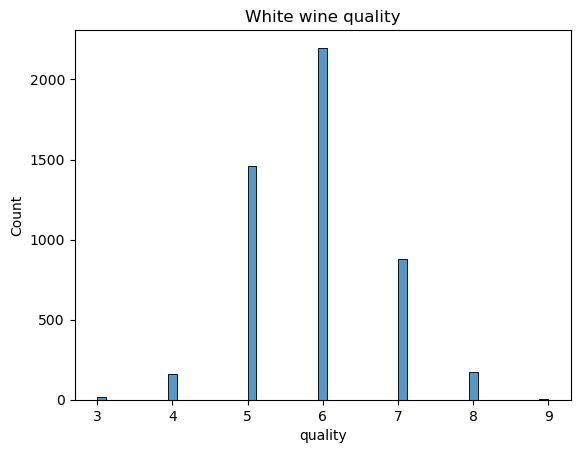

In [252]:
sns.histplot(df_combined['quality'][df_combined['Wine Type'] == 'White']).set_title("White wine quality")

Text(0.5, 1.0, 'Red wine alcohol content in %')

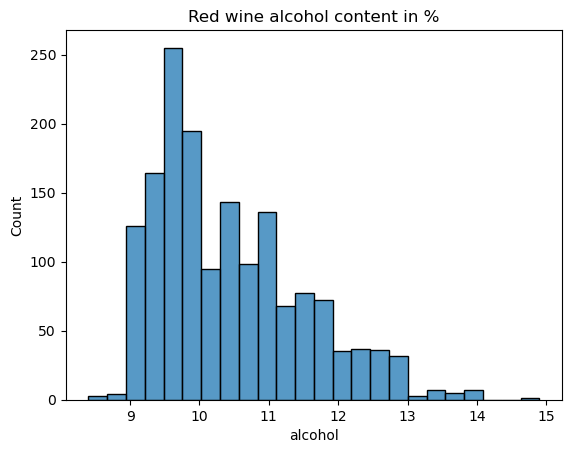

In [254]:
sns.histplot(df_combined['alcohol'][df_combined['Wine Type'] == 'Red']).set_title("Red wine alcohol content in %")

Text(0.5, 1.0, 'White wine alcohol content in %')

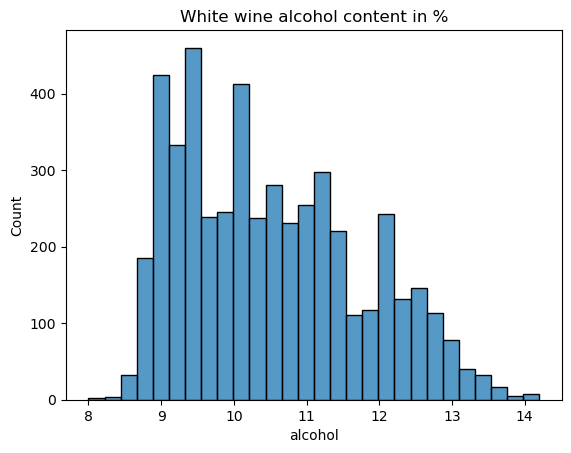

In [256]:
sns.histplot(df_combined['alcohol'][df_combined['Wine Type'] == 'White']).set_title("White wine alcohol content in %")

Text(0.5, 1.0, 'Red wine residual sugar')

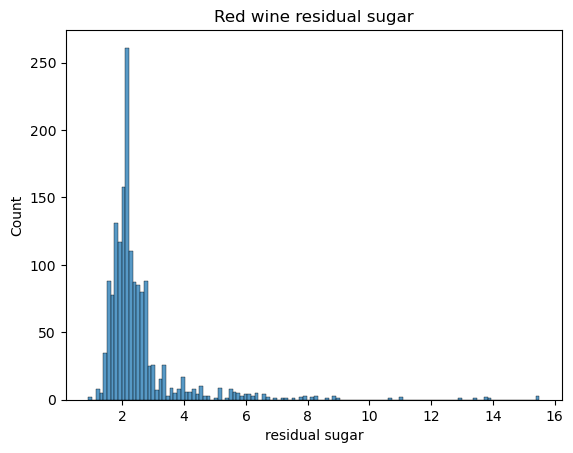

In [258]:
sns.histplot(df_combined['residual sugar'][df_combined['Wine Type'] == 'Red']).set_title("Red wine residual sugar")

Text(0.5, 1.0, 'White wine residual sugar')

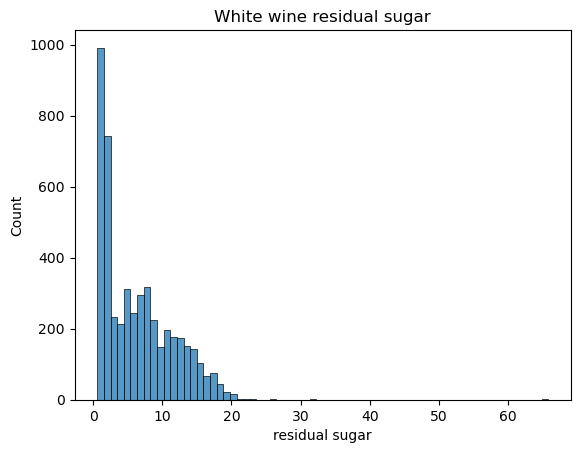

In [259]:
sns.histplot(df_combined['residual sugar'][df_combined['Wine Type'] == 'White']).set_title("White wine residual sugar")

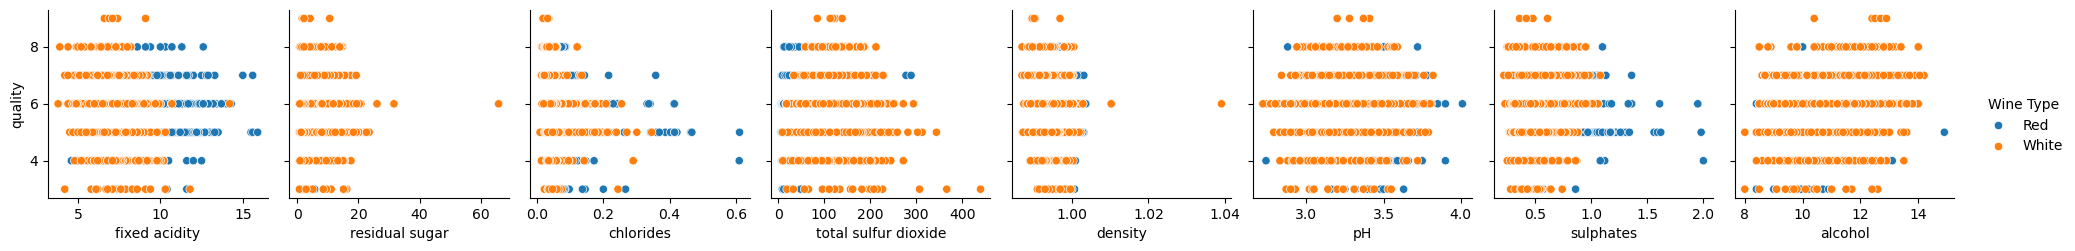

In [261]:
sns.pairplot(df_combined,
             x_vars = ['fixed acidity','residual sugar','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol'],
             y_vars = 'quality',
             hue='Wine Type')

a. the diagrams show how of ten the certain values appears in the column

b. based on the diagram i would say that white wine has a higher quality but not by too much

c. the white wine seems to have a higher average alcohol %

d. the white wine definitely has more sugar on average

e. i would say alcohol influences the quality but residual sugar doesn't as much

### 7

### 8

In [266]:
bins = np.linspace(2.5, 4.5, num=6)
labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]


df_combined['pH Category'] = pd.cut(df_combined['pH'], bins=bins, labels=labels, right=False)

In [267]:
df_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type,pH Category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,3.3-3.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,2.9-3.3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,2.9-3.3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,2.9-3.3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,3.3-3.7


In [268]:
df_combined['pH Category'].value_counts()

pH Category
2.9-3.3    4445
3.3-3.7    1939
2.5-2.9      79
3.7-4.1      34
4.1-4.5       0
Name: count, dtype: int64

with 5 bins the most common bin is 2.9-3.3 by far

In [270]:
bins = np.linspace(2.5, 4.5, num=11)
labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]

df_combined['pH Category2'] = pd.cut(df_combined['pH'], bins=bins, labels=labels, right=False)

In [271]:
df_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine Type,pH Category,pH Category2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,3.3-3.7,3.5-3.7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,2.9-3.3,3.1-3.3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,2.9-3.3,3.1-3.3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,2.9-3.3,3.1-3.3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,3.3-3.7,3.5-3.7


In [272]:
df_combined['pH Category2'].value_counts()

pH Category2
3.1-3.3    3095
3.3-3.5    1635
2.9-3.1    1350
3.5-3.7     304
2.7-2.9      79
3.7-3.9      32
3.9-4.1       2
2.5-2.7       0
4.1-4.3       0
4.3-4.5       0
Name: count, dtype: int64

with 5 bins the most common bin is 3.1-3.3 by a bit less than double the next bin

### 9

In [275]:
correlation_matrix = df_num.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


<Axes: >

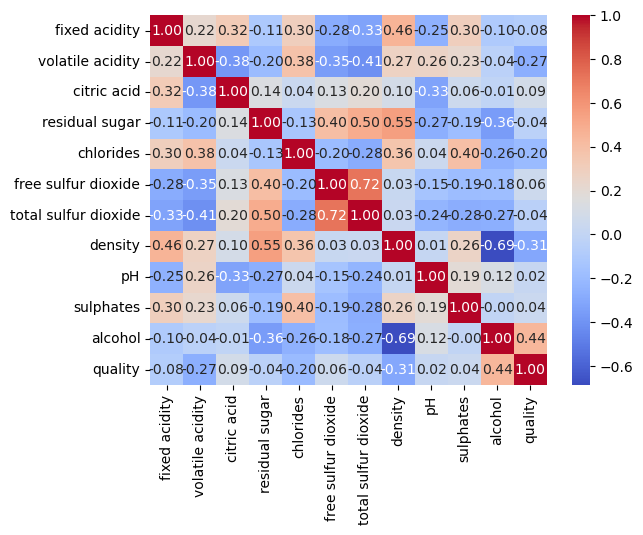

In [276]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Alcohol has the highest influence on wine quality, the lowest appears to be the pH value, density has a somewhat high negative correlation which implies the lower the density the higher the quality to a certain extent

### 10

In [279]:
df_red_num = df_red.drop('Wine Type',axis =1)
df_white_num = df_white.drop('Wine Type',axis =1)

In [280]:
correlation_matrix_red = df_red_num.corr()
correlation_matrix_white = df_white_num.corr()

<Axes: >

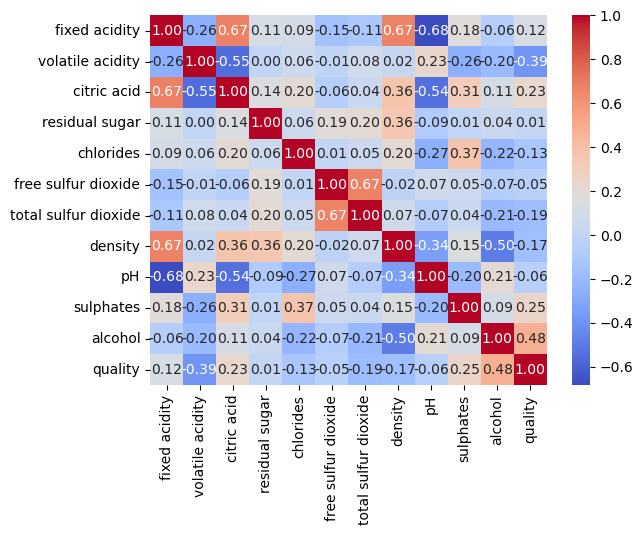

In [283]:
sns.heatmap(correlation_matrix_red, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

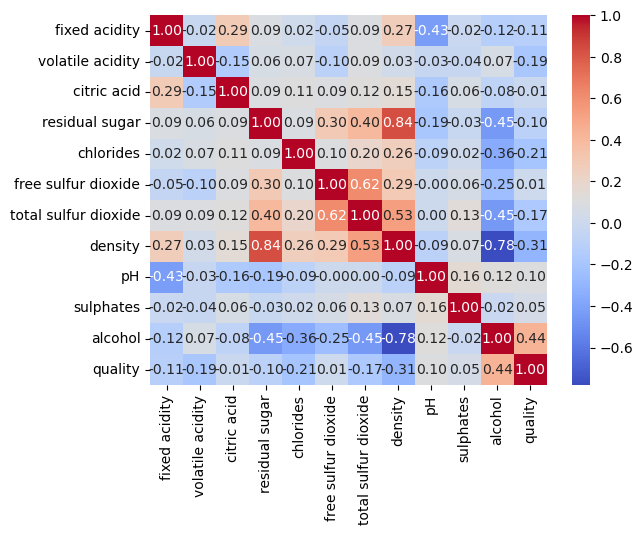

In [290]:
sns.heatmap(correlation_matrix_white, annot=True, cmap='coolwarm', fmt=".2f")

it is mostly the same for white wine though some values like volatile acidity has fallen and total sulfur dioxide has gotten a stronger negative correlation

for red wine quite a few attributes has gotten a stronger correlation like Sulphates and citric acid, while density has less of a negative correlation

### 11

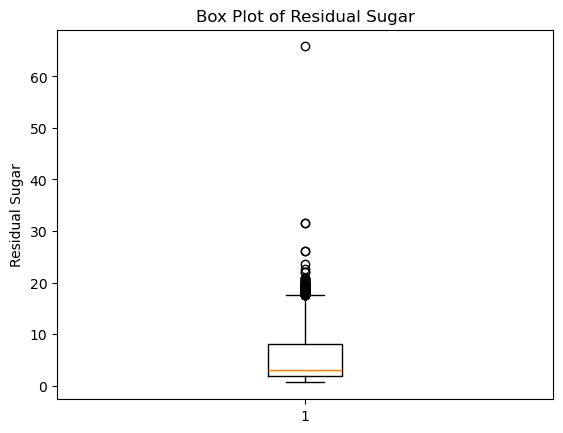

In [296]:
plt.boxplot(df_combined['residual sugar'])
plt.title('Box Plot of Residual Sugar')
plt.ylabel('Residual Sugar')
plt.show()


In [298]:
Q1 = df_combined['residual sugar'].quantile(0.25)
Q3 = df_combined['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

In [299]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound

-7.6499999999999995

In [301]:
outliers = df_combined[(df_combined['residual sugar'] < lower_bound) | (df_combined['residual sugar'] > upper_bound)]

In [306]:
df_combined_out = df_combined[~df_combined.isin(outliers).any(axis=1)]

In [308]:
df_combined_out.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000,6379.000000
mean,7.220795,0.340610,0.317725,5.183116,0.056124,30.335946,114.826854,0.994595,3.220245,0.532239,10.513682,5.825208
std,1.304331,0.165419,0.144621,4.347631,0.035300,17.746884,56.398164,0.002879,0.160733,0.149554,1.186725,0.875802
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,76.000000,0.992280,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,28.000000,117.000000,0.994800,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,7.800000,0.065000,41.000000,155.000000,0.996840,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,17.500000,0.611000,289.000000,440.000000,1.003690,4.010000,2.000000,14.900000,9.000000


no more values above the upper bound(17.549...) or below (-7.649...)

### 12

In [312]:
df_combined_corr = df_combined_out.drop(
    ['sulphates','pH','total sulfur dioxide','free sulfur dioxide','chlorides','residual sugar','citric acid','volatile acidity','fixed acidity',
    'pH Category','pH Category2']
        ,axis = 1)

In [314]:
df_combined_corr.head()

,density,alcohol,quality,Wine Type
0,0.9978,9.4,5,Red
1,0.9968,9.8,5,Red
2,0.9970,9.8,5,Red
3,0.9980,9.8,6,Red
4,0.9978,9.4,5,Red


In [316]:
label_encoder = preprocessing.LabelEncoder()

In [318]:
df_combined_corr['Wine Type'] = label_encoder.fit_transform(df_combined_corr['Wine Type'])

In [320]:
df_combined_corr['Wine Type'].unique()

array([0, 1])

In [322]:
df_combined_corr.sample(10)

,density,alcohol,quality,Wine Type
2831,0.99200,12.6,7,1
5732,0.99411,10.8,6,1
2872,0.99380,10.9,5,1
3937,0.99756,9.7,5,1
3013,0.99090,11.3,6,1
2563,0.99720,9.5,6,1
4687,0.98876,12.3,6,1
608,1.00260,10.4,6,0
5980,0.99198,12.2,6,1
2304,0.99300,10.9,5,1
